<a href="https://colab.research.google.com/github/sachchit-k/Daily-Uploads/blob/main/09-23-2022-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
import pandas as pd

In [189]:
df=pd.read_csv('/content/drive/MyDrive/py-master/py-master/ML/13_kmeans/income.csv', encoding = "ISO-8859-1")

In [190]:
display(df)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [191]:
df=df.drop(columns='Name')

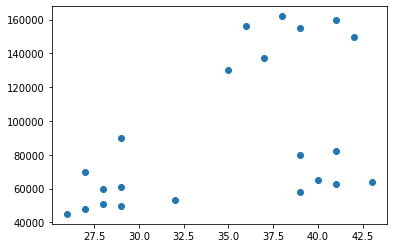

In [192]:
plt.scatter(df['Age'],df['Income($)'])

In [193]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [194]:
pred=km.fit_predict(df)

In [195]:
pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [196]:
df['cluster']=pred
df.head()

,Age,Income($),cluster
0,27,70000,2
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0


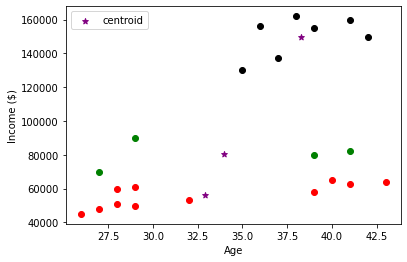

In [197]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# df4 = df[df.cluster==3]

plt.scatter(df1['Age'],df1['Income($)'],color='black')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='green')
# plt.scatter(df4.Age,df4['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [208]:
scaler=MinMaxScaler()

In [220]:
df['Income($)']=scaler.fit_transform(df[['Income($)']])

In [221]:
df['Age']=scaler.fit_transform(df[['Age']])

In [222]:
df.head()

,Age,Income($),cluster,cluster2
0,0.058824,0.213675,2,2
1,0.176471,0.384615,2,2
2,0.176471,0.136752,1,0
3,0.117647,0.128205,1,0
4,0.941176,0.897436,0,1


In [223]:
km=KMeans(n_clusters=3)

In [224]:
pred1=km.fit_predict(df[['Age','Income($)']])

In [225]:
pred1

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [226]:
df['cluster2']=pred1

In [227]:
df

,Age,Income($),cluster,cluster2
0,0.058824,0.213675,2,0
1,0.176471,0.384615,2,0
2,0.176471,0.136752,1,0
3,0.117647,0.128205,1,0
4,0.941176,0.897436,0,2
5,0.764706,0.940171,0,2
6,0.882353,0.982906,0,2
7,0.705882,1.000000,0,2
8,0.588235,0.948718,0,2
9,0.529412,0.726496,0,2


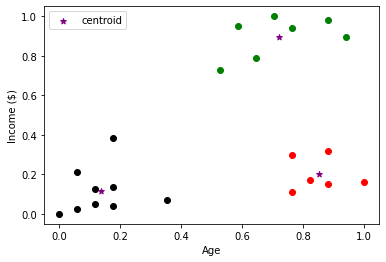

In [228]:
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]
# df4 = df[df.cluster==3]

plt.scatter(df1['Age'],df1['Income($)'],color='black')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='green')
# plt.scatter(df4.Age,df4['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()